In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import warnings                        
warnings.filterwarnings("ignore")

In [2]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
path = "C:/Users/mini9/Desktop/GitHub Projects/Machine Learning Practice/iris.data"
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv(path,names=names)

In [4]:
dataset.shape

(150, 5)

In [5]:
dataset

sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [6]:
dataset.describe()

sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [7]:
dataset.groupby("class").size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Univariate Plots

sepal-length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal-width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal-length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal-width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

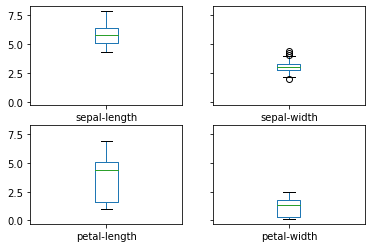

In [8]:
dataset.plot(kind ='box',subplots=True,layout=(2,2),sharex=True,sharey=True)

array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

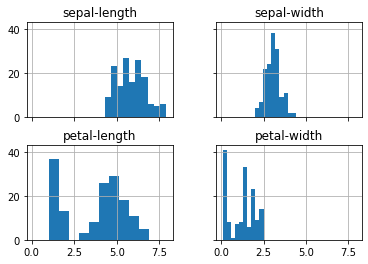

In [9]:
dataset.hist(sharex = True, sharey=True)

## Multivariate Plots

<Figure size 1440x720 with 0 Axes>

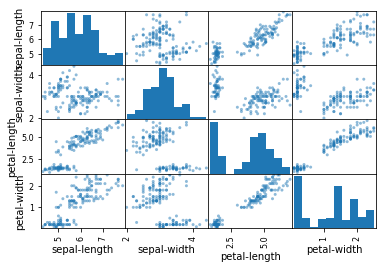

In [10]:
plt.figure(figsize=(20,10))
scatter_matrix(dataset)
plt.show()

In [11]:
dataset['class'].replace('Iris-setosa', 0,inplace=True)
dataset['class'].replace('Iris-versicolor', 1,inplace=True)
dataset['class'].replace('Iris-virginica', 2,inplace=True)

In [12]:
from sklearn.model_selection import train_test_split
y = dataset["class"]

features = ["sepal-length", "sepal-width", "petal-length", "petal-width"]
X = dataset[features]

X_train , X_test, y_train, y_test = train_test_split(X , y , random_state = 1)

In [13]:
y_train.shape

(112,)

In [14]:
y_train

54     1
108    2
112    2
17     0
119    2
      ..
133    2
137    2
72     1
140    2
37     0
Name: class, Length: 112, dtype: int64

In [15]:
y_train1 = pd.get_dummies(y_train)
y_test1 = pd.get_dummies(y_test)

In [16]:
y_train1

0  1  2
54   0  1  0
108  0  0  1
112  0  0  1
17   1  0  0
119  0  0  1
..  .. .. ..
133  0  0  1
137  0  0  1
72   0  1  0
140  0  0  1
37   1  0  0

[112 rows x 3 columns]

#### Logistic Regression

In [58]:
model1 = LogisticRegression(random_state = 1)

In [59]:
model1.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [60]:
#from sklearn.model_selection import cross_val_score
#cv1 = cross_val_score(model1 , X_train, y_train, cv = 6, scoring='accuracy')

In [61]:
pred1 = model1.predict(X_test)

In [87]:
from sklearn.metrics import mean_absolute_error
error1 = mean_absolute_error(y_test, pred1)
print("Mean absolute error is: {:,.5f}".format(error1))
print("Accuracy: ",model1.score(X_test, y_test) * 100)
print("Weights: ", model1.coef_)
print("Intercept: ", model1.intercept_)

Mean absolute error is: 0.02632
Accuracy:  97.36842105263158
Weights:  [[-0.43010628  0.79550509 -2.30764629 -0.95781826]
 [ 0.6275485  -0.41930478 -0.20442032 -0.77841701]
 [-0.19744223 -0.37620031  2.51206662  1.73623527]]
Intercept:  [  9.36572575   1.42966325 -10.795389  ]


In [124]:
model1 = LogisticRegression( C=1).fit(X_train, y_train)
model1.score(X_test, y_test)

from sklearn.model_selection import cross_val_score
model1 = LogisticRegression( C=6, random_state=42)
scores1 = cross_val_score(model1, X, y, cv=5)
print((scores1.mean(), scores1.std()))

(0.9733333333333334, 0.02494438257849294)


#### Linear Discriminant analysis

In [63]:
model2 = LinearDiscriminantAnalysis()

In [64]:
model2.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [65]:
pred2 = model2.predict(X_test)

In [88]:
error2 = mean_absolute_error(y_test, pred2)
print("Mean absolute error is: {:,.5f}".format(error2))
print("Accuracy: ",model2.score(X_test, y_test) * 100)
print("Weights: ", model2.coef_)
print("Intercept: ", model2.intercept_)

Mean absolute error is: 0.00000
Accuracy:  100.0
Weights:  [[  9.09103398  10.14211681 -18.49001808 -17.92230917]
 [ -1.34246991  -3.92882103   3.9008226    2.4464455 ]
 [ -7.0908361   -5.8945953   13.45128537  14.14503151]]
Intercept:  [-20.77986388  -0.69174267 -25.02113706]


In [125]:
model2 = LinearDiscriminantAnalysis().fit(X_train, y_train)
model2.score(X_test, y_test)

model2 = LinearDiscriminantAnalysis()
scores2 = cross_val_score(model2, X, y, cv=5)
print((scores2.mean(), scores2.std()))

(0.9800000000000001, 0.02666666666666666)


#### KNN

In [67]:
model3 = KNeighborsClassifier()

In [68]:
model3.fit(X_train,y_train)

KNeighborsClassifier()

In [69]:
pred3 = model3.predict(X_test)

In [89]:
error3 = mean_absolute_error(y_test, pred3)
print("Mean absolute error is: {:,.5f}".format(error3))
print("Accuracy: ",model3.score(X_test, y_test) * 100)

Mean absolute error is: 0.00000
Accuracy:  100.0


In [126]:
model3 = KNeighborsClassifier().fit(X_train, y_train)
model3.score(X_test, y_test)

model3 = KNeighborsClassifier()
scores3 = cross_val_score(model3, X, y, cv=5)
print((scores3.mean(), scores3.std()))

(0.9733333333333334, 0.02494438257849294)


#### Decision Tree Classifier

In [76]:
model4 = DecisionTreeClassifier(random_state=1)

In [77]:
model4.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [78]:
pred4 = model4.predict(X_test)

In [90]:
error4 = mean_absolute_error(y_test, pred4)
print("Mean absolute error is: {:,.5f}".format(error4))
print("Accuracy: ",model4.score(X_test, y_test) * 100)

Mean absolute error is: 0.02632
Accuracy:  97.36842105263158


In [127]:
model4 = DecisionTreeClassifier().fit(X_train, y_train)
model4.score(X_test, y_test)

model4 = DecisionTreeClassifier(random_state=42)
scores4 = cross_val_score(model4, X, y, cv=5)
print((scores4.mean(), scores4.std()))

(0.9533333333333334, 0.03399346342395189)


#### GaussianNB

In [81]:
model5 = GaussianNB()

In [83]:
model5.fit(X_train,y_train)

GaussianNB()

In [84]:
pred5 = model5.predict(X_test)

In [91]:
error5 = mean_absolute_error(y_test, pred5)
print("Mean absolute error is: {:,.5f}".format(error5))
print("Accuracy: ",model5.score(X_test, y_test) * 100)

Mean absolute error is: 0.02632
Accuracy:  97.36842105263158


In [128]:
model5 = GaussianNB().fit(X_train, y_train)
model5.score(X_test, y_test)

model5 = GaussianNB()
scores5 = cross_val_score(model5, X, y, cv=5)
print((scores5.mean(), scores5.std()))

(0.9533333333333334, 0.02666666666666666)


#### SVC

In [120]:
from sklearn import svm
model6 = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
model6.score(X_test, y_test)

1.0

In [129]:
from sklearn.model_selection import cross_val_score
model6= svm.SVC(kernel='linear', C=6, random_state=42)
scores6 = cross_val_score(clf, X, y, cv=5)

In [130]:
print((scores6.mean(), scores6.std()))

(0.9733333333333334, 0.038873012632301994)
